# Final ML Project: Medical Adherence Lab

#### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

#### Load Data

In [103]:
df = pd.read_csv('diabetes_data.csv')
df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [104]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


#### Continuous Variables

- **Age**
- **BMI**
- **AlcoholConsumption**
- **PhysicalActivity**
- **DietQuality**
- **SleepQuality**
- **SystolicBP**
- **DiastolicBP**
- **FastingBloodSugar**
- **HbA1c**
- **SerumCreatinine**
- **BUNLevels**
- **CholesterolTotal**
- **CholesterolLDL**
- **CholesterolHDL**
- **CholesterolTriglycerides**
- **FatigueLevels**
- **QualityOfLifeScore**
- **MedicalCheckupsFrequency**
- **HealthLiteracy**
- **MedicationAdherence** *(target)*

---

#### Discrete (Categorical/Binary) Variables

- **Gender**
- **Ethnicity**
- **SocioeconomicStatus**
- **EducationLevel**
- **Smoking**
- **FamilyHistoryDiabetes**
- **GestationalDiabetes**
- **PolycysticOvarySyndrome**
- **PreviousPreDiabetes**
- **Hypertension**
- **AntihypertensiveMedications**
- **Statins**
- **AntidiabeticMedications**
- **FrequentUrination**
- **ExcessiveThirst**
- **UnexplainedWeightLoss**
- **BlurredVision**
- **SlowHealingSores**
- **TinglingHandsFeet**
- **HeavyMetalsExposure**
- **OccupationalExposureChemicals**
- **WaterQuality**
- **Diagnosis**


#### Given that medical adherence is our target variable, we will first make a distribution plot to see how it is distributed.

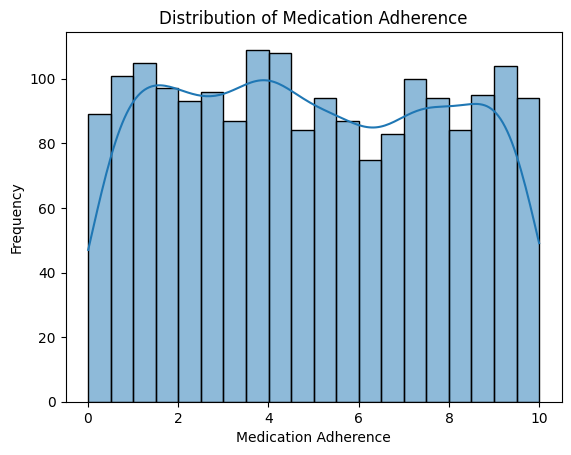

In [105]:
sns.histplot(df, x='MedicationAdherence', bins=20, kde=True)
plt.title('Distribution of Medication Adherence')
plt.xlabel('Medication Adherence')
plt.ylabel('Frequency')
plt.show()

#### In healthcare and the pharmaceutical industry, setting the adherence threshold at 5.0 out of 10 strikes a meaningful balance between clinical relevance and real-world actionability. Patients who score below this level are often considered at risk of not receiving the full benefit of their treatment, which can lead to worse health outcomes and higher healthcare costs. Companies like Eli Lilly, along with healthcare providers, focus heavily on identifying and supporting these patients early. By using a threshold of 5.0, we’re capturing those who show moderate or lower commitment to their medication regimen — the group most likely to benefit from targeted interventions like education, reminders, or personalized support. This approach mirrors how adherence is often handled in real-world disease management programs, making the model both practical and aligned with industry priorities.

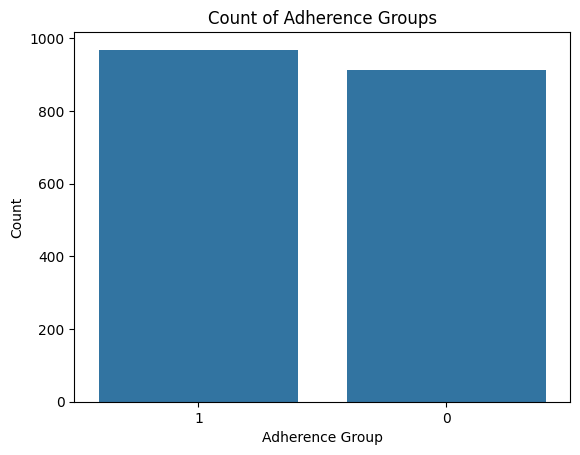

In [106]:
def preprocess_adherence_data(df):
    # Label adherence data into three groups of 0, 1, and 2
    df['AdherenceGroup'] = pd.cut(df['MedicationAdherence'], bins=[0, 5, 10], labels=[1, 0])
    # Drop the original MedicationAdherence column
    df.drop(columns=['MedicationAdherence'], inplace=True)
    return df
df = preprocess_adherence_data(df)

# Visualize the count of each adherence group
sns.countplot(x='AdherenceGroup', data=df)
plt.title('Count of Adherence Groups')
plt.xlabel('Adherence Group')
plt.ylabel('Count')
plt.show()


#### We can see that there are multi categorical variables such as ethnicity. We can use one hot encoding to convert these categorical variables into numerical variables.

In [107]:
# List of multi-categorical variables to encode
multi_categoricals = ['Ethnicity']

# One-hot encode
df = pd.get_dummies(df, columns=multi_categoricals, drop_first=True)

print(df.shape)
df.head()


(1879, 48)


,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,HealthLiteracy,Diagnosis,DoctorInCharge,AdherenceGroup,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,6000,44,0,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,0,1.782724,7.211349,1,Confidential,1,True,False,False
1,6001,51,1,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,1,3.381070,5.024612,1,Confidential,0,False,False,False
2,6002,89,1,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,2.701019,7.034944,0,Confidential,0,False,False,False
3,6003,21,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,1,1.409056,4.717774,0,Confidential,1,True,False,False
4,6004,27,1,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,1.218452,7.887940,0,Confidential,0,False,False,False


#### Drop Useless Columns

In [108]:
# Dropping PatientID and DoctorInCharge columns
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

#### Prevalence

In [109]:
# Check prevalence of each adherence group
adherence_counts = df['AdherenceGroup'].value_counts(normalize=True)
print(adherence_counts)

AdherenceGroup
1    0.515168
0    0.484832
Name: proportion, dtype: float64


#### Defining Features (X) and Target (y)

In [319]:
X = df.drop(columns=['AdherenceGroup'])
y = df['AdherenceGroup'] 

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1879, 45)
Shape of y: (1879,)


#### Train/Test Split

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(1315, 45) (564, 45)
AdherenceGroup
1    0.514829
0    0.485171
Name: proportion, dtype: float64
AdherenceGroup
1    0.515957
0    0.484043
Name: proportion, dtype: float64


#### Print Max Features

In [321]:
import numpy as np
print('max_features = ' + str(np.sqrt(X.shape[1]))) #around 6

max_features = 6.708203932499369


#### Random Forest Model

In [322]:
RFC = RandomForestClassifier(
    n_estimators=1000,             
    max_features=6,          
    bootstrap=True,
    max_samples=0.8,      
    max_depth=15,    
    oob_score=True,
    random_state=1984,
    n_jobs=-1
)

adherence_rf = RFC.fit(X_train, y_train)

#### Model Evaluation

In [323]:
# F1 score, Recall, Accuracy
y_pred = adherence_rf.predict(X_test)
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

Precision:  0.48967381557075357
F1 Score:  0.4874077456712684
Recall:  0.4929078014184397


#### OOB Error

In [324]:
print('OOB error rate: ' + str(1 - adherence_rf.oob_score_))

OOB error rate: 0.4783269961977187


#### Confusion Matrix for Train

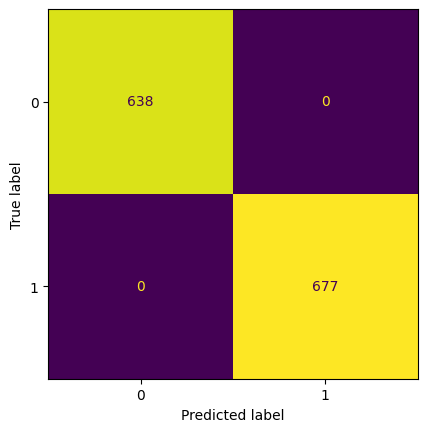

In [325]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_train,y_train, colorbar= False)

#### Confusion Matrix for Test

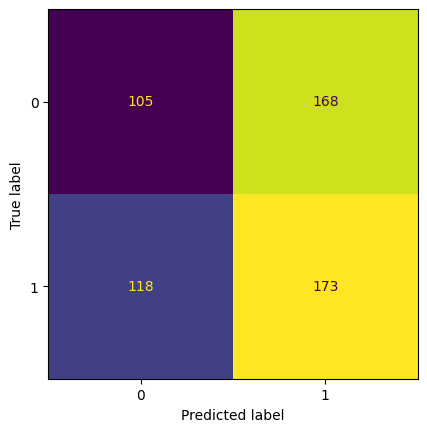

In [326]:
# Test data Confusion Matrix
y_pred = adherence_rf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_test,y_test, colorbar= False)

#### Binary Class Probability

In [287]:
probs = adherence_rf.predict_proba(X_test)

# Row with highest positive class probability
max_pos_idx = np.argmax(probs[:, 1])
max_pos_prob = probs[max_pos_idx, 1]

# Row with highest negative class probability
max_neg_idx = np.argmax(probs[:, 0])
max_neg_prob = probs[max_neg_idx, 0]

print(f"Highest probability of being POSITIVE: row {max_pos_idx}, prob = {max_pos_prob:.4f}")
print(f"Highest probability of being NEGATIVE: row {max_neg_idx}, prob = {max_neg_prob:.4f}")

Highest probability of being POSITIVE: row 140, prob = 0.6733
Highest probability of being NEGATIVE: row 491, prob = 0.6379


#### Plotting the Distribution

/tmp/ipykernel_36869/3451350458.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_class_probs, shade=True, color='blue')


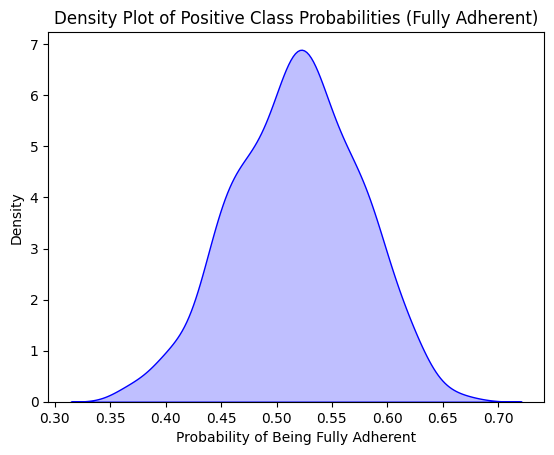

In [288]:
positive_class_probs = adherence_rf.predict_proba(X_test)[:, 1]
sns.kdeplot(positive_class_probs, shade=True, color='blue')

plt.title('Density Plot of Positive Class Probabilities (Fully Adherent)')
plt.xlabel('Probability of Being Fully Adherent')
plt.ylabel('Density')
plt.show()

#### Feature Importance Visualization

In [289]:
print(pd.DataFrame(adherence_rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False))

                               importance
CholesterolTriglycerides         0.055047
QualityOfLifeScore               0.048673
CholesterolHDL                   0.047317
CholesterolLDL                   0.045975
HbA1c                            0.045828
DietQuality                      0.045811
HealthLiteracy                   0.044062
SleepQuality                     0.043386
BUNLevels                        0.043014
PhysicalActivity                 0.042945
MedicalCheckupsFrequency         0.042872
CholesterolTotal                 0.042722
FastingBloodSugar                0.042199
FatigueLevels                    0.041693
BMI                              0.041040
SerumCreatinine                  0.040556
AlcoholConsumption               0.038522
SystolicBP                       0.037779
Age                              0.037373
DiastolicBP                      0.036484
EducationLevel                   0.014507
Statins                          0.010480
SocioeconomicStatus              0

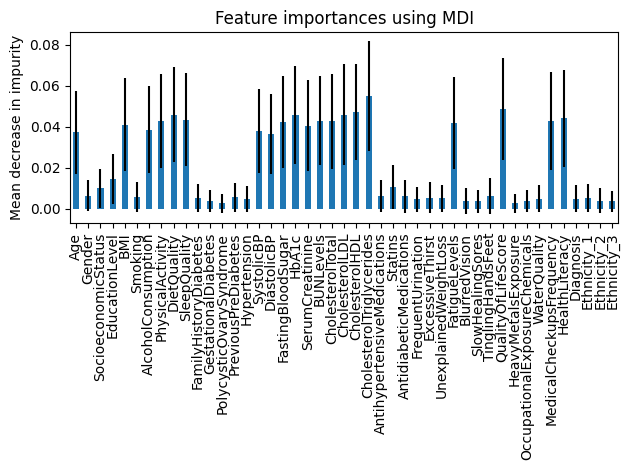

In [290]:
importances = adherence_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in adherence_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Dropping Unimportant Features from Feature Importance

In [291]:
# Removing low importance features from X_train
low_importance_features = forest_importances[forest_importances < 0.01].index
X_train2 = X_train.drop(columns=low_importance_features)
X_test2 = X_test.drop(columns=low_importance_features)
print(f"X_train shape: {X_train2.shape}")
print(f"X_test shape: {X_test2.shape}")

X_train shape: (1315, 23)
X_test shape: (564, 23)


#### Gridsearch

In [292]:
# Grid Search for hyperparameter tuning
param_grid = {
    'max_samples': [0.3, 0.5, 0.8],
    'max_depth': [5, 10, 15, None],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(
        n_estimators=500,
        max_features=6,
        bootstrap=True,
        max_depth=None,
        oob_score=True,
        random_state=1984,
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train2, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .......................max_depth=5, max_samples=0.3; total time=   2.3s
[CV] END .......................max_depth=5, max_samples=0.3; total time=   2.4s
[CV] END .......................max_depth=5, max_samples=0.3; total time=   2.6s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   2.6s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   2.6s
[CV] END ......................max_depth=10, max_samples=0.3; total time=   2.5s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   2.6s
[CV] END ......................max_depth=10, max_samples=0.3; total time=   2.6s
[CV] END .......................max_depth=5, max_samples=0.8; total time=   2.7s
[CV] END ......................max_depth=10, max_samples=0.3; total time=   2.6s
[CV] END .......................max_depth=5, max_samples=0.8; total time=   2.8s
[CV] END .......................max_depth=5, max

#### Finding Best n for Trees

In [297]:
n_estimators_list = [100,200,300,400,500,600,700,800,900,1000]
forest_list = [RandomForestClassifier(n_estimators = n,
        max_features=6,          
        bootstrap=True,
        max_samples=0.8,      
        max_depth=5,
        oob_score=True,
        random_state=1984,
        n_jobs=-1).fit(X_train2, y_train) for n in n_estimators_list]

forest_list[:3]

[RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8, n_jobs=-1,
                        oob_score=True, random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                        n_estimators=200, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                        n_estimators=300, n_jobs=-1, oob_score=True,
                        random_state=1984)]

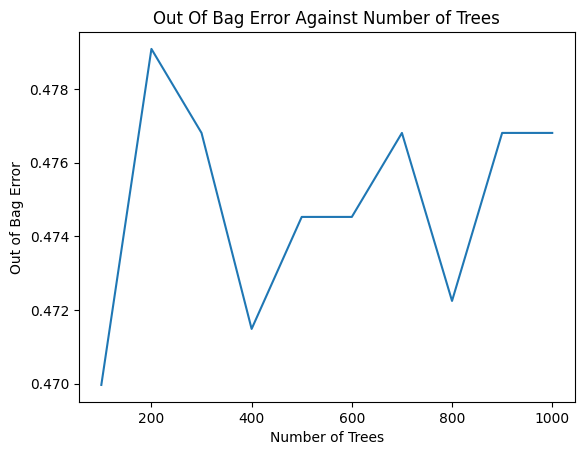

In [298]:
oob_errors = ([1-i.oob_score_ for i in forest_list])
plt.plot(n_estimators_list,oob_errors)
plt.title('Out Of Bag Error Against Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag Error')
plt.show()

#### Finding Best Max for Features

In [299]:
max_features_list = [1,2,3,4,5,6,7]

forest_list2 = [RandomForestClassifier(
        n_estimators = 800,
        max_features=n,          
        bootstrap=True,
        max_samples=0.8,      
        max_depth=5,   
        oob_score=True,
        random_state=1984,
        n_jobs=-1).fit(X_train2, y_train) for n in max_features_list]
forest_list2[:3]

[RandomForestClassifier(max_depth=5, max_features=1, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=2, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=3, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984)]

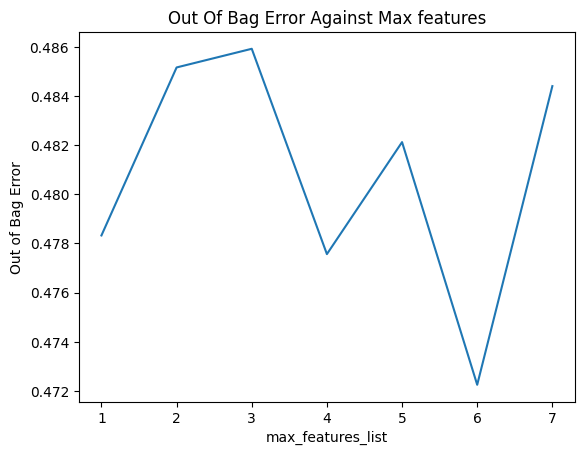

In [300]:
oob_errors1 = ([1-i.oob_score_ for i in forest_list2])
plt.plot(max_features_list,oob_errors1)
plt.title('Out Of Bag Error Against Max features')
plt.xlabel('max_features_list')
plt.ylabel('Out of Bag Error')
plt.show()

#### Best Model

In [301]:
adherence_rf_eng = forest_list2[5]
adherence_rf_eng

RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                       n_estimators=800, n_jobs=-1, oob_score=True,
                       random_state=1984)

#### Best Model and Original Model Comparison

original model error: 0.464638783269962
new model error: 0.47224334600760454


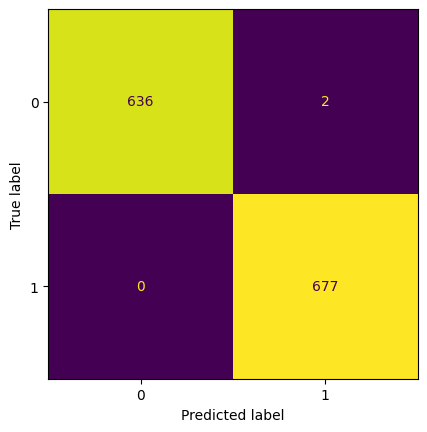

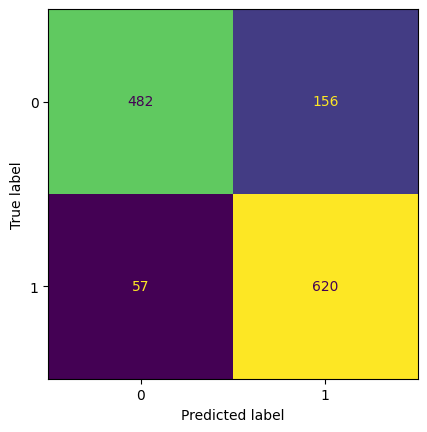

In [302]:
print('original model error: ' +str(1-adherence_rf.oob_score_))
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_train,y_train, colorbar= False)

#New
print('new model error: ' + str(1-adherence_rf_eng.oob_score_))
ConfusionMatrixDisplay.from_estimator(adherence_rf_eng,X_train2,y_train, colorbar= False)

#### New Test Confusion Matrix

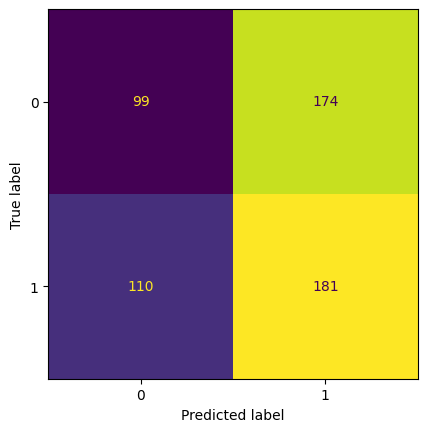

In [303]:
adherence_predict = adherence_rf_eng.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(y_test,adherence_predict, colorbar= False)

#### Variable Importance for New Model

In [304]:
# Variable Importance
print(pd.DataFrame(adherence_rf_eng.feature_importances_,index = X_train2.columns,columns=['importance']).sort_values('importance', ascending=False))

                          importance
CholesterolTriglycerides    0.096329
QualityOfLifeScore          0.070157
CholesterolLDL              0.064436
CholesterolHDL              0.059302
HbA1c                       0.050423
DietQuality                 0.047599
HealthLiteracy              0.046814
SleepQuality                0.046441
BMI                         0.044699
PhysicalActivity            0.043571
FatigueLevels               0.043063
SerumCreatinine             0.042382
FastingBloodSugar           0.042191
BUNLevels                   0.041226
MedicalCheckupsFrequency    0.039342
CholesterolTotal            0.038997
Age                         0.038064
AlcoholConsumption          0.036393
DiastolicBP                 0.036252
SystolicBP                  0.033460
Statins                     0.017560
EducationLevel              0.014998
SocioeconomicStatus         0.006300


#### Accuracy Scores

In [305]:
y_pred = adherence_rf_eng.predict(X_test2)

print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

Precision:  0.49234894247906247
F1 Score:  0.48796691431006384
Recall:  0.49645390070921985


#### ROC Curve

Text(0.5, 0, 'False Positive Rate')

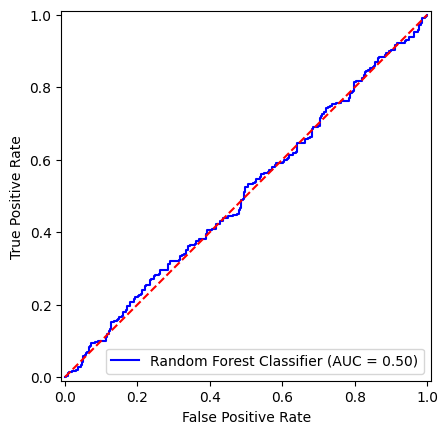

In [306]:
# ROC Curve
RocCurveDisplay.from_estimator(
    adherence_rf_eng,
    X_test2,
    y_test,
    name="Random Forest Classifier",
    color="blue",
)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [307]:
pred = adherence_rf_eng.predict_proba(X_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

ix =  np.argmax(tpr - fpr)
print('Best Threshold: %f' % thresholds[ix])

Best Threshold: 0.555519


#### Optimal Point

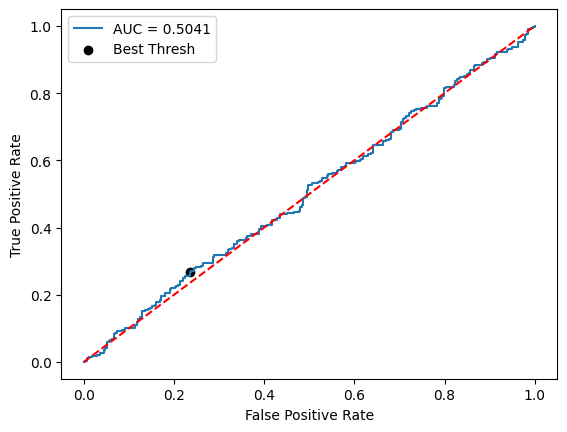

In [308]:
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % auc) 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Thresh')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()